# Linear regression with Normal distributed errors
We now have all of the necessary theory and tools to estimate most commonly used econometrics models using Bayesian methods. 

In this lecture, we will estimate the linear regression model with Normal distributed errors (commonly referred to as the *normal linear regression model*). A detailed motivation for the use of the regression model can be found in any standard econometrics textbook. Here we focus on how to estimate it using Bayesian methods. First, load some packages.

In [1]:
# Load packages
using Distributions  # Work with standard probability distributions
using Interact       # Create widgets 
using Plots          # Create plots
using LinearAlgebra  # Use extra linear algebra functions such as the identity matrix I(n)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3205163398184831103\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11527008155119692371\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3205163398184831103\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Model
Let $y_t$ denote an observation of a time series of interest at date t, $t=1,\dots,T$, which we believe are driven by various independent time series observations $x_{i,t}$, $i=2,\dots,k$. Then, the linear regression model is given by
$$
y_{t} =\beta_{1}+x_{2,t}\beta_{2} + \dots + x_{k,t}\beta_{k}+\varepsilon_{t},
$$
in which $\varepsilon_{t}$ is a random error term. 

**Remarks**
1. We allow for an intercept by specifying $x_{1,t}=1$ for all dates $t=1,\dots,T$.
2. Replacing the time subscripts $t=1,\dots,T$ with unit subscripts $i=1,\dots,n$ returns the familiar regression model for cross sectional data.
3. Defining the $x_{i,t}$ to be lags of the dependent variable $y_{t}$, i.e. $y_{t-i}$, gives the commonly used autoregressive (AR) model.

In this lecture, we will assume that the errors are independent and identically distributed (iid) Normal distributed errors
$$
\varepsilon_{t} {\sim}{N}\left(0,\sigma^{2}\right)
$$

## Estimation

To estimate the model, it will be convenient to use [matrix notation](https://en.wikipedia.org/wiki/Matrix_(mathematics)), i.e.
$$
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon},
$$
in which $\mathbf{y}=(y_1,\dots,y_T)'$, $\boldsymbol{\beta}={\beta_1,\dots,\beta_k}$, $\boldsymbol{\varepsilon}={\varepsilon,\dots,\varepsilon_T}$ and 
$$
\mathbf{X} = \left[\begin{array}{cc}
1 & x_{2,1} & x_{3,1} & \dots & x_{k,1} \\
1 & x_{2,2} & x_{3,2} & \dots & x_{k,2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{2,T} & x_{3,T} & \dots & x_{k,T} \\
\end{array}\right]
$$

Moreover  
$$
\boldsymbol{\varepsilon} {\sim}N\left(\mathbf{0},\boldsymbol{\Sigma}\right)
$$
in which $N\left(\mathbf{0},\boldsymbol{\Sigma}\right)$ denotes the [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) located at the [zero vector](https://mathworld.wolfram.com/ZeroVector.html) $\mathbf{0}$ with covariance matrix $\boldsymbol{\Sigma}=\sigma^2\mathbf{I}_T$, where $\mathbf{I}_T$ is the $T\times T$ [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix).

Using the fact that an [*affine transformation* of a Normal random vector is a Normal random vector](https://math.stackexchange.com/questions/332441/affine-transformation-applied-to-a-multivariate-gaussian-random-variable-what), the probability model representation of the linear regression model is given by
$$
\mathbf{y} \sim N\left(\mathbf{X}\boldsymbol{\beta},\boldsymbol{\Sigma}\right)
$$
Estimating the normal linear regression model is therefore the same as estimating the parameters of a multivariate Normal distribution with unknown mean and covariance.

To estimate the model parameters $\boldsymbol{\beta}$ and $\sigma^2$ with Bayesian methods we apply Bayes rule
$$
\begin{align}
p(\boldsymbol{\beta},\sigma^2|\mathbf{y}) &= \frac{p(\mathbf{y}|\boldsymbol{\beta},\sigma^2)p(\boldsymbol{\beta},\sigma^2)}{p(\mathbf{y})}\\
&\propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2)p(\boldsymbol{\beta},\sigma^2)\\
\end{align}
$$
in which $p(\mathbf{y}|\boldsymbol{\beta},\sigma^2)$ is the likelihood function and $p(\boldsymbol{\beta},\sigma^2)$ is the (joint) prior distribution. We now consider each in
turn.

**Remarks**: 
1. For notational convenience, we have omitted the set of independent variables in $\mathbf{X}$ from the conditioning set.

### Likelihood
Using the probability model representation, the likelihood is given by
$$
\begin{align}
p(\mathbf{y}|\boldsymbol{\beta},\sigma^2) &= |2\pi\boldsymbol{\Sigma}|^{-\frac{1}{2}}\exp(-\frac{1}{2}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})'\boldsymbol{\Sigma}^{-1}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}))\\
&= (2\pi\sigma^2)^{-\frac{T}{2}}\exp(-\frac{1}{2\sigma^2}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})'(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}))
\end{align}
$$
in which $|\cdot|$ denotes the [determinant](https://en.wikipedia.org/wiki/Determinant). Note that the second equality follows from the facts that (1)  $|\boldsymbol{\Sigma}|=|\sigma^2\mathbf{I}_T|=(\sigma^2)^T$ and (2) $\boldsymbol{\Sigma}^{-1}=(\sigma^2\mathbf{I}_T)^{-1}=\frac{1}{\sigma^2}$. 

### Priors 
When specifying the priors, we need to take a stance on the dependence between the model parameters $\boldsymbol{\beta}$ and $\sigma^2$. 

If we believe that the regression coefficients might depend on the error variance, i.e. $p(\boldsymbol{\beta},\sigma^2)=p(\boldsymbol{\beta}|\sigma^2)p(\sigma^2)$, then it turns out (see [Chapter 2 of Koop's Bayesian Econometrics](https://www.amazon.com/Bayesian-Econometrics-Gary-Koop/dp/0470845678)) that the natural conjugate prior for $\boldsymbol{\beta}$ and $\sigma^2$ is the [Normal-Gamma distribution](https://en.wikipedia.org/wiki/Normal-gamma_distribution) denoted by
$$
\boldsymbol{\beta},\sigma^2 \sim NG(m_0,v_0,\nu_0,S_0)
$$
in which $m_0,v_0,\nu_0$ and $S_0$ are hyperparameters. 

If we believe that the regression coefficients and the error variance are independent, i.e. $p(\boldsymbol{\beta},\sigma^2)=p(\boldsymbol{\beta})p(\sigma^2)$, then it's convenient to specify the following conjugate priors
1. Multivariate Normal prior for $\boldsymbol{\beta}$, i.e. $\boldsymbol{\beta}\sim N(\mathbf{m}_0,\mathbf{V}_0)$
2. Inverse-Gamma prior for $\sigma^2$, i.e. $\sigma^2\sim IG(\nu_0,S_0)$

It what follows we will assume the latter and leave the former as a homework exercise.

**Remarks**: 
1. We have used a multivariate normal prior for all of the regression coefficients. If, for some reason, we believed that one of the coefficients behaved differently, then we could use a different prior for that coefficient. For example, we could restrict the support of a coefficient to be positive or negative by using a [truncated Normal prior](https://en.wikipedia.org/wiki/Truncated_normal_distribution). 

### Posterior
To get the posterior, we combine the prior and likelihood
$$
\begin{align}
p(\boldsymbol{\beta},\sigma^2|\mathbf{y}) &\propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2)p(\boldsymbol{\beta})p(\sigma^2)\\
                     &\propto \underset{p(\mathbf{y}|\boldsymbol{\beta},\sigma^2)}{\underbrace{(\sigma^2)^{-\frac{T}{2}}\exp(-\frac{1}{2\sigma^2}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})'(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}))}}\underset{p(\boldsymbol{\beta})}{\underbrace{\exp(-\frac{1}{2}(\boldsymbol{\beta}-\mathbf{m}_0)'\mathbf{V}_0(\boldsymbol{\beta}-\mathbf{m}_0))}}\underset{p(\sigma^2)}{\underbrace{(\sigma^2)^{-(\nu_0+1)}\exp(-\frac{S_0}{\sigma^2})}}\\
                     &\propto (\sigma^2)^{-(\frac{T}{2}\nu_0+1)}\exp(-\frac{1}{2\sigma^2}(S_0 + (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})'(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})) -\frac{1}{2}(\boldsymbol{\beta}-\mathbf{m}_0)'\mathbf{V}_0(\boldsymbol{\beta}-\mathbf{m}_0)))\\
\end{align}
$$
The final expression is an unknown distribution, however given our knowledge that a two-block Gibbs sampler can be used to estimate the parameters of a univariate Normal distribution (see Lecture 4), it makes sense to determine whether we can use a similar Gibbs Sampler can be used to estimate the parameters of a multivariate Normal distribution. The full conditional distributions are
1. $p(\boldsymbol{\beta}|\mathbf{y},\sigma^2)\propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2)p(\boldsymbol{\beta})$
2. $p(\sigma^2|\mathbf{y},\boldsymbol{\beta})\propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2) p(\sigma^2)$

First block: for notational convenience we will write $\frac{1}{\sigma^2}$ as $\boldsymbol{\Sigma}^{-1}$ where $\boldsymbol{\Sigma}=\sigma^2\mathbf{I}_T$. Then 
$$
\begin{align}
p(\boldsymbol{\beta}|\mathbf{y},\sigma^2)&\propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2)p(\boldsymbol{\beta})\\
                          &\propto\exp(-\frac{1}{2}((\mathbf{y}-\mathbf{X}\boldsymbol{\beta})'\boldsymbol{\Sigma}^{-1}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}))\exp(-\frac{1}{2}(\boldsymbol{\beta}-\mathbf{m}_0)'\mathbf{V}_0^{-1}(\boldsymbol{\beta}-\mathbf{m}_0))\\
                          &\propto\exp(-\frac{1}{2}((\boldsymbol{\beta}'\mathbf{X}'\boldsymbol{\Sigma}^{-1}\mathbf{X}\boldsymbol{\beta}-2\boldsymbol{\beta}'\mathbf{X}'\boldsymbol{\Sigma}^{-1}\mathbf{y}))\exp(-\frac{1}{2}(\boldsymbol{\beta}'\mathbf{V}_0^{-1}\boldsymbol{\beta}-2\boldsymbol{\beta}'\mathbf{V}_0^{-1}\mathbf{m}_0))\\
                          &=\exp(-\frac{1}{2}(\boldsymbol{\beta}'(\mathbf{X}'\boldsymbol{\Sigma}^{-1}\mathbf{X}+\mathbf{V}_0^{-1})\boldsymbol{\beta}-2\boldsymbol{\beta}'(\mathbf{X}'\boldsymbol{\Sigma}^{-1}\mathbf{y} + \mathbf{V}_0^{-1}\mathbf{m}_0))\\
\end{align}
$$
The final expression is the kernel of a multivariate Normal distribution. To see this more clearly, note that if
$$
\boldsymbol{\beta}|\mathbf{y},\sigma^2\sim N(\hat{\boldsymbol{\beta}},\mathbf{D}_\beta)
$$ 
then
$$
p(\boldsymbol{\beta}|\mathbf{y},\sigma^2)\propto\exp(-\frac{1}{2}(\boldsymbol{\beta}'\mathbf{D}_\beta^{-1}\boldsymbol{\beta}-2\boldsymbol{\beta}'\mathbf{D}_\beta^{-1}\hat{\boldsymbol{\beta}}))
$$
Thus, $\hat{\boldsymbol{\beta}}=\mathbf{D}_\beta(\mathbf{X}'\boldsymbol{\Sigma}^{-1}\mathbf{y} + \mathbf{V}_0^{-1}\mathbf{m}_0)$ and $\mathbf{D}_{\beta}=(\mathbf{X}'\boldsymbol{\Sigma}^{-1}\mathbf{X}+\mathbf{V}_0^{-1})^{-1}$.

Second block:
$$
\begin{align}
p(\sigma^2|\mathbf{y},\boldsymbol{\beta}) &\propto p(\mathbf{Y}|\boldsymbol{\beta},\sigma^2) p(\sigma^2)\\
                       &= (\sigma^2)^{-(\frac{T}{2}+\nu_0+1)}\exp(-\frac{1}{\sigma^2}(S_0 + (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})'(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}))
\end{align}
$$
The final expression is the kernel of an inverse-gamma density with scale parameter $\nu = \frac{T}{2}+\nu_0$ and shape parameter $S = S_0 + (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})'(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})$. Thus
$$
\sigma^2|\mathbf{Y},\boldsymbol{\beta}\sim IG(\nu,S)
$$

**Remarks**:
1. The matrix $\boldsymbol{\Sigma}^{-1}$ is often referred to as the [*precision matrix*](https://en.wikipedia.org/wiki/Precision_%28statistics%29).

## Computational points

### Hyperparameters
When selecting the hyperparameter values, note that
1. The prior mean $\boldsymbol{\beta}_0$ is often chosen to be a zero vector or the [ordinary least squares (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares#:~:text=In%20statistics%2C%20ordinary%20least%20squares%20%28OLS%29%20is%20a,the%20unknown%20parameters%20in%20a%20linear%20regression%20model.) estimator: $\hat{\beta} = (\mathbf{X}'\mathbf{X})^{-1}(\mathbf{X}'\mathbf{y})$. The former prior is in line with the prior belief that the time series is a random walk, while the latter prior is in line with the prior belief that the OLS estimator provides a good point estimate. 
2. The covariance matrix $\mathbf{V}_{\boldsymbol{\beta}}$ is used to express our degree of confidence about the prior mean. For instance, let $\mathbf{V}_{\boldsymbol{\beta}}=c\mathbf{I}_{k}$. If we are not confident about possible values for the prior mean, then selecting a large value for $c$ will result in a large prior variance (called an uninformative or non-informative prior), and vice verse. 
3. The shape $\nu_0$ must be set such that $\nu_0>1$ for mean to exist and $\nu_0>2$ for variance to exist. Smaller values result in a larger variance and vice versa. 
4. The scale parameter $S_0$ can be chosen to pin down the prior mean of $\sigma^2$ using the fact that $\mathbb{E}[\sigma^2]=S_0(\nu_0-1)^{-1}$, i.e $S_0=\mathbb{E}[\sigma^2](\nu_0-1)$. 

In simulation studies, we find that setting $\hat{\beta}$ equal to either the zero vector or the OLS estimator, $\mathbf{V}_{\boldsymbol{\beta}}=10\mathbf{I}_{k}$, $\nu_0 = 3$ and $S_0=\nu_0-1$ (i.e. $\mathbb{E}[\sigma^2]=1$) works well.

### Sampling from a Multivariate Normal distribution

We can directly sample from the Multivariate Normal distribution using the functions "rand(MvNormal(mu, Sigma))" within the Distributions package. That being said, it is computationally more efficient to use the following idea.

**Sampling from a Multivariate Normal Distribution**: To obtain samples from an $n-$dimensional random vector $\mathbf{V}={V_1,\dots,V_n}$ with a multivariate Normal Distribution given by $N(\boldsymbol{\mu},\boldsymbol{\Sigma})$, we perform the following steps
1. Compute the lower [Cholesky factorizator](https://en.wikipedia.org/wiki/Cholesky_decomposition) $\mathbf{P}$, such that  $\boldsymbol{\Sigma}=\mathbf{P}\mathbf{P}'$
2. Generate $\mathbf{Z}=(Z_1,\dots,Z_n)$ by sampling $Z_i\sim N(0,1)$, $i=1,\dots,n$
3. Return the affine transformation $\mathbf{V}=\boldsymbol{\mu} + \mathbf{P}\mathbf{Z}$
If we want a sample of $R$ draws, then repeat the algorithm $R$ times.

**Exercise**: Use $\mathbf{V}=\boldsymbol{\mu} + \mathbf{P}\mathbf{Z}$ to show that $\mathbf{V}\sim N(\boldsymbol{\mu},\boldsymbol{\Sigma})$.

In [8]:
## Sample from a Multivariate Normal Distribution
# Set up Normal random vector
n=2; # Dimension of Normal random vector 
@show mu = ones(n);
A = randn(n,n); 
@show Sig = A'*A; # positive definite matrix

# Simulate
R = 10000; # Simulation size
U = zeros(R,2); # storage matrix
for i in 1:R
    U[i,:] = transpose(mu + (cholesky(Sig).L)*rand(Normal(0,1),n));
end

# Summary statistics
@show muhat = mean(U,dims=1);
@show Sighat = cov(U);


mu = ones(n) = [1.0, 1.0]
Sig = A' * A = [0.24378932636649445 0.3181136537609491; 0.3181136537609491 1.018768095805817]
muhat = mean(U, dims = 1) = [1.0018744221049307 0.9969195974654598]
Sighat = cov(U) = [0.24641472823258606 0.3260503399629987; 0.3260503399629987 1.044943904287139]


# Worked Example: Autoregressive Model
The autoregressive (AR) model is one of the most widely used models in empirical macroeconomics and finance. Its equation representation is given by
$$
y_t = \rho_0 + \rho_1 y_{t-1} + \dots + \rho_p y_{t-p} + e_t, \quad e_t\sim N(0,\sigma^2)
$$
in which $\rho_0$ is an unknown real-valued constant, $\rho_i$, $i=1,\dots,p$ are unknown AR coefficients and $\sigma^2>0$ is the unknown error variance. The number of lagged terms $p$ determines the order of the AR process and we denote this as AR(p). We estimate the AR(1) model on simulated data as follows.

**Remarks**:
1. The AR(p) model is a linear regression model in which the $x_{i,t}$ are replaced with $y_{t-i}$, $i=1,\dots,p$.
2. The random walk with drift model from Lecture 4 can be viewed as an AR model in which $\rho_1=1$. Given a real dataset, we could test for this restriction by conducting a model comparison exercise with the Bayes factor.


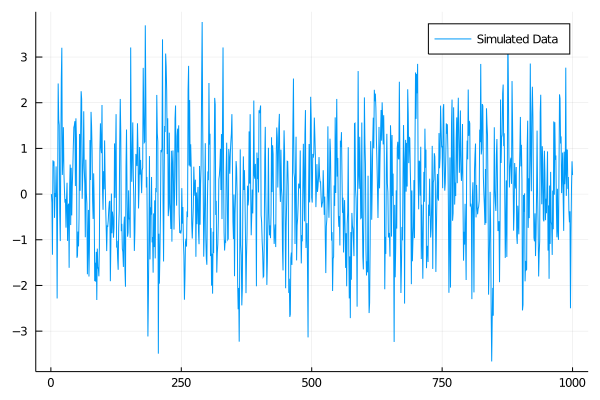

In [3]:
## Simulate Data for AR(1) process
true_beta0 = 0;   # true intercept
true_beta1 = 0.6; # true AR(1) coefficient
true_sig2 = 1;    # true variance

T = 1000; # no. of dates
y0 = true_beta0/(1-true_beta1); # initial condition
y = zeros(T); # storage vector

y[1] = y0;
for t = 2:T
    y[t] = true_beta0 + true_beta1*y[t-1] + rand(Normal(0,sqrt(true_sig2)));
end

data = y;
x = collect(1:1:T);
plot(x,data, label="Simulated Data")


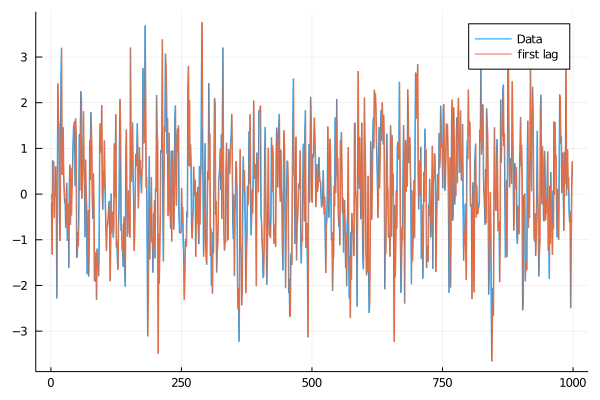

In [4]:
# Define key variables in linear regression model
p = 1;              # AR order
y0 = data[1:p];     # Initial conditions
y = data[p+1:end];  # Observations
T = size(y,1);      # Dates after removing initial conditions
X = [ones(T) data[1:end-1]]; # intercept and first lag

x = collect(1:1:T);
plot(x,y, label="Data")
plot!(x,X[:,2], label="first lag")


true_beta = [true_beta0 true_beta1] = [0.0 0.6]
post_beta = mean(s_beta, dims = 1) = [0.03070455671137322 0.5232153918148904]
true_sig2 = 1
post_sig2 = mean(s_sig2) = 1.0691845635668547


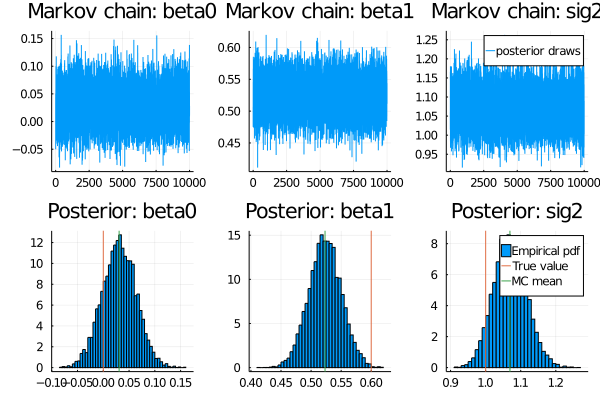

In [5]:
## Gibbs Sampler
# Controls
nburn = 1000;
ndraws = nburn + 10000;

# Prior for beta
k = size(X,2);                    # number of regressors
pri_m = zeros(k);                 # prior mean
pri_v = Diagonal(10*ones(k));     # prior covariance
pri_beta = MvNormal(pri_m,pri_v); # prior distribution

# Prior for sig2
pri_nu = 3;                           # prior shape parameter  
pri_S = 1*(pri_nu-1);                 # prior scale parameter - sets E(pri_sig2) = 1
pri_sig2 = InverseGamma(pri_S,pri_S); # prior distribution

# Storage
s_beta = zeros(ndraws-nburn,k);
s_sig2 = zeros(ndraws-nburn,1);

# Deterministic terms in posterior
post_nu = pri_nu + T/2;   # posterior shape parameter for sig2 
inv_priV = (pri_v)\I(k);  # inverse prior covariance for beta
XpX = X'*X; 
Xpy = X'*y; 

# Initial conditions
MC_beta = XpX\Xpy;
MC_sig2 = (y-X*MC_beta)'*(y-X*MC_beta)/T;

# Markov chain
for loop in 1:ndraws
# Draw beta
    post_v = (XpX/MC_sig2 + inv_priV)\I(k);
    post_m = post_v*(Xpy/MC_sig2 + inv_priV*pri_m);
    #MC_beta = post_m + (cholesky(post_v).L)*rand(Normal(0,1),k);
    global MC_beta = post_m + (cholesky(Hermitian(post_v)).L)*rand(Normal(0,1),k);

# Draw sig2
    post_S = pri_S +0.5*(y-X*MC_beta)'*(y-X*MC_beta);
    global MC_sig2 = rand(InverseGamma(post_nu,post_S));

# Store
    if loop > nburn
        count_loop = loop - nburn;
        s_beta[count_loop,:] = transpose(MC_beta);
        s_sig2[count_loop] = MC_sig2;
    end
end

## Summarize results
# Compute posterior mean using Monte Carlo Integration
    @show true_beta = [true_beta0 true_beta1];
    @show post_beta = mean(s_beta,dims=1);

    @show true_sig2
    @show post_sig2 = mean(s_sig2);

# Trace plots
x = collect(1:(ndraws-nburn))
p1a = plot(x,s_beta[:,1], title = "Markov chain: beta0", legend = false);
p1b = plot(x,s_beta[:,2], title = "Markov chain: beta1", legend = false);
p1c = plot(x,s_sig2, title = "Markov chain: sig2", label="posterior draws");

# Plot marginal posterior distributions
x = collect(0:0.1:5);
histogram(x,s_beta[:,1], normalize=:pdf, title = "Posterior: beta0", legend = false)
plot!([true_beta0], seriestype="vline", legend = false)
p2a = plot!([post_beta[1]], seriestype="vline", legend = false)

histogram(x,s_beta[:,2], normalize=:pdf, title = "Posterior: beta1", legend = false)
plot!([true_beta1], seriestype="vline", legend = false)
p2b = plot!([post_beta[2]], seriestype="vline", legend = false)

histogram(x,s_sig2, normalize=:pdf, title = "Posterior: sig2", label="Empirical pdf")
plot!([true_sig2], seriestype="vline", label="True value")
p2c = plot!([post_sig2], seriestype="vline", label="MC mean")

plot(p1a,p1b,p1c,p2a,p2b,p2c,layout = (2,3))

**Remark**:
1. When using the function "cholesky(A)" in Julia it will give an error if the input matrix A is not exactly [Hermitian](https://mathworld.wolfram.com/HermitianMatrix.html#:~:text=Hermitian%20Matrix.%20A%20square%20matrix%20is%20called%20Hermitian,%20%282%29%20where%20denotes%20the%20complex%20%20conjugate.). This error might occur when inverting a matrix. To fix it, use the command "cholesky(Hermitian(A))". We have done this in the above code.

# Conclusion
The normal linear regression model is widely used in the modeling of both cross-sectional and time series data in economics and finance. In this lecture we learned how to estimate the model with Bayesian methods. 

If we believe that the regression coefficients might depend on the error variance then the natural conjugate prior is a Normal-Gamma prior distribution which yields an analytical solution for the posterior distribution (see [Chapter 2 of Koop's Bayesian Econometrics](https://www.amazon.com/Bayesian-Econometrics-Gary-Koop/dp/0470845678)). 

If we believe that the regression coefficients are independent of the error variance, then specifying independent Normal and inverse-Gamma priors for the coefficients and error variance facilitates the use of a two-block Gibbs Sampler for posterior simulation. This is because these priors are conjugate priors for the Normal likelihood which allows us to directly sample from the full conditional distributions using direct Monte Carlo sampling.

In a time series context, changing the independent variables of the regression model $x_{i,t}$, to lagged versions of the dependent variable, $y_{t-i}$, enables us to estimate the [autoregressive (AR) model](https://en.wikipedia.org/wiki/Autoregressive_model). By adding lags of other independent variables, we can similarly estimate the [distributed lag (DL) model](https://en.wikipedia.org/wiki/Distributed_lag) or an ARDL model. As shown in [Chapter 3 of Chan (2017)](http://www.joshuachan.org/papers/BayesMacro.pdf), we could also extend the framework considered here to estimate the [moving average (MA) model](https://en.wikipedia.org/wiki/Moving-average_model). A straight forward extension can be applied to estimate the more general class of [autoregressive moving average ARMA models](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model).

In the next lecture we will learn how to estimate the linear regression model with t-distributed errors. 

## Recommended reading
I recommend that you check out the following alternative presentations of the same material (a different perspective might deepen your understanding of the material):
1. Chapter 2 of Joshua C. C. Chan's [Notes on Bayesian Macroeconometrics](http://joshuachan.org/notes_BayesMacro.html). For extensions of the linear regression model to t-distributed errors and moving average errors see Chapter 3.
2. Chapters 2-4 of Gary Koop's book [Bayesian Econometrics](https://www.amazon.com/Bayesian-Econometrics-Gary-Koop/dp/0470845678). For extensions to Nonlinear Regression, General Error Covariance Matrices and Panel Data, see Chapters 5-7.